In [1]:
#Installation
!pip install vptree
!pip install imutils

  Created wheel for vptree: filename=vptree-1.2-py3-none-any.whl size=4373 sha256=08d1a9b0173e94c59e12ca25c1e61a53f9b83005022ef0012d1b6820e863d0fb
  Stored in directory: /root/.cache/pip/wheels/c9/21/cd/62eb42b147e7d391e8bbea7efcdac5aa5ad6f263ed78aebf34
Successfully built vptree
  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=41d31a2a6af798a43b4f9964582159efd50b4ba341b719b95f86de3cfd5bfecc
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils


In [2]:
#Importing dependencies
import numpy as np
import pandas as pd
import cv2
from imutils import paths
import argparse
import pickle
import vptree
import matplotlib.pyplot as plt
import time

In [3]:
#For Image Hashing
def dhash(image, hashSize=8):
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))
	diff = resized[:, 1:] > resized[:, :-1]
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

#Converting data types
def convert_hash(h):
	return int(np.array(h, dtype="float64"))

def hamming(a, b):
	return bin(int(a) ^ int(b)).count("1")

In [4]:
imagePaths = list(paths.list_images("../input/image-for-similarity/image_Similarity/"))
hashes= {}

#Loading and hashing the images
for (i, img_path) in enumerate(imagePaths):
    
    image = cv2.imread(img_path)
    h = dhash(image)
    h = convert_hash(h)
    l = hashes.get(h, [])
    l.append(img_path)
    hashes[h] = l

In [5]:
points = list(hashes.keys())
tree = vptree.VPTree(points, hamming) #Creating VP-Tree

In [6]:
#serializing VP-Tree
f = open("tree.pickle", "wb")
f.write(pickle.dumps(tree))
f.close()

# serialize the hashes to dictionary
f = open("hashes.pickle", "wb")
f.write(pickle.dumps(hashes))
f.close()

In [7]:
tree = pickle.loads(open("tree.pickle", "rb").read())
hashes = pickle.loads(open("hashes.pickle", "rb").read())

# compute the hash for the query image, then convert it
queryHash = dhash(image)
queryHash = convert_hash(queryHash)

In [8]:
image = cv2.imread("../input/image-for-similarity/image_Similarity/airplanes/image_0001.jpg")

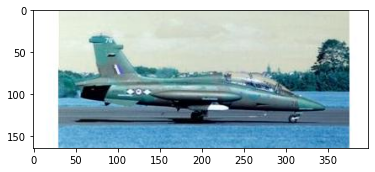

In [9]:
plt.imshow(image)

In [10]:
queryHash = dhash(image)
queryHash = convert_hash(queryHash)

In [11]:
start = time.time()
results = tree.get_all_in_range(queryHash, 13)
results = sorted(results)
end = time.time()
print(">>> search took {} seconds".format(end - start))

>>> search took 0.03977847099304199 seconds


>>> 1 total image(s) with d: 0, h: 1.0003893963414622e+19


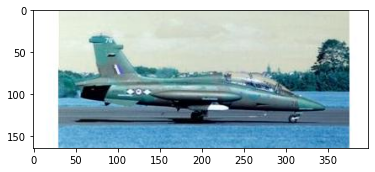

>>> 1 total image(s) with d: 10, h: 1.230519185812441e+19


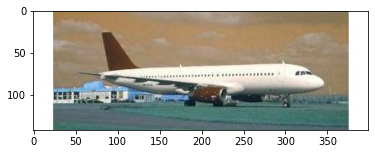

In [12]:
# loop over the results
for (d, h) in results[:2]:
    resultPaths = hashes.get(h, [])
    print(">>> {} total image(s) with d: {}, h: {}".format(len(resultPaths), d, h))
    for resultPath in resultPaths:
        result = cv2.imread(resultPath)
        plt.imshow(result)
        plt.show()